 # Human-Centric Learning Analytics – EDA Overview

In this notebook, we explore synthetic learner data from both SQL (SQLite) and NoSQL (MongoDB).

## 1. Loading Data from SQLite

We'll start with loading the learners and clickstream data from our local learning_analytics.db (SQL).

In [3]:
# Imports

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

In [7]:
# Connecting to SQLite and loading tables 

# Connect to the SQL database
conn = sqlite3.connect("../data/learning_analytics.db")

# Load Tables into DataFrames
learners_df= pd.read_sql_query("SELECT * FROM learners", conn) 
clickstream_df= pd.read_sql_query("SELECT * FROM clickstream", conn) 

# Close the connection
conn.close()

# Preview the data
learners_df.head()

,learner_id,name,age,gender,average_score
0,0,Mary,58,25,51.25
1,1,Ashley,35,33,61.16
2,2,Mark,24,52,54.35
3,3,Robert,45,20,51.49
4,4,Andrew,31,32,75.27


## 2. EXPLORATORY DATA ANALYSIS:

2.1 Analyzing the number of events per learner:

In [10]:
# Counting the number of clickstream events per learner
events_per_learner = clickstream_df["learner_id"].value_counts().sort_index()
events_per_learner

learner_id
0     28
1     22
2     76
3     59
4     35
      ..
95    55
96    21
97    80
98    33
99    30
Name: count, Length: 100, dtype: int64

In [11]:
# Convert to DataFrame for plotting
events_df = events_per_learner.reset_index()
events_df.columns = ['learner_id', 'event_count']

# Preview the top 5
events_df.head() 

,learner_id,event_count
0,0,28
1,1,22
2,2,76
3,3,59
4,4,35


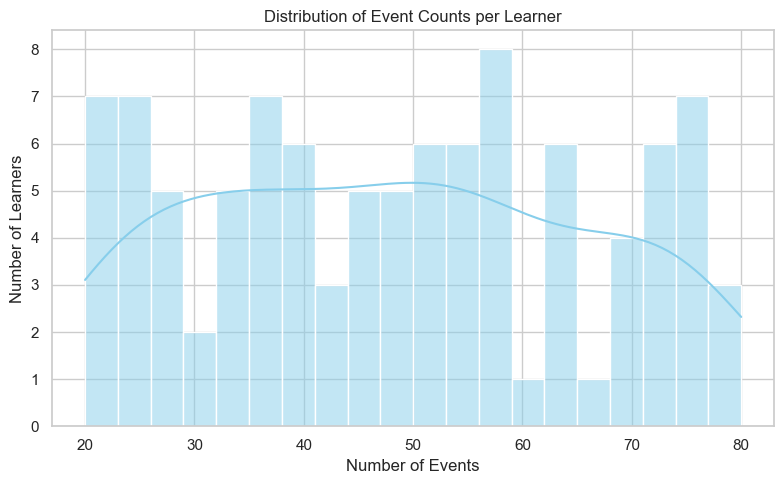

In [12]:
# Histogram of number of events per learner
plt.figure(figsize=(8, 5))
sns.histplot(events_df['event_count'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Event Counts per Learner")
plt.xlabel("Number of Events")
plt.ylabel("Number of Learners")
plt.tight_layout()
plt.show()


-> Analysis:

the Histogram shows how many events each learner generated.

-> Observations:

- Most learners hover around 40–60 events.

- Distribution is fairly uniform (no major spike or drop).

- A few outliers hit ~80 events; potential power users or bots.

-> Interpretation:

- The system generates realistic variation in engagement.

- No learners with 0 events; this is good data.

- Could set a baseline for defining “low engagement” (<30) or “high engagement” (>70).

C:\Users\lynab\AppData\Local\Temp\ipykernel_30752\3430902413.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_learners, x='learner_id', y='event_count', palette='viridis')


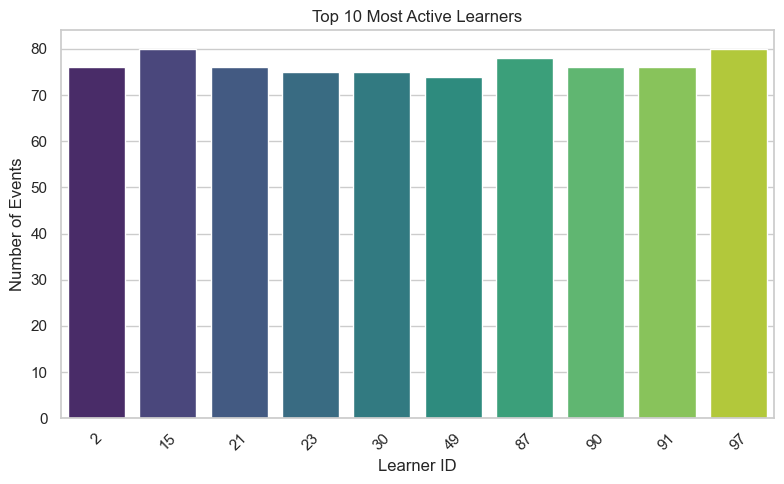

In [13]:
# Top 10 most active learners
top_learners = events_df.sort_values(by='event_count', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_learners, x='learner_id', y='event_count', palette='viridis')
plt.title("Top 10 Most Active Learners")
plt.xlabel("Learner ID")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


-> Analysis:

The Bar chart shows the 10 learners with the most recorded events.

-> Observations:

- All top 10 users have ~75–80 events, meaning they’re maximally active.

- Distribution among top learners is very flat — no single learner dominates.

- Learners 15, 87, and 97 tie for the top spot.

-> Interpretation:

We may use this to profile high performers or reward high participation.

Also useful to study behavior patterns of the top group: what events do they trigger? What reflections do they write?